<a href="https://colab.research.google.com/github/tallpress/fastai/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Linear Regresssion

In [0]:
from fastai import *
from torch import tensor
from torch import torch
import matplotlib.pyplot as plt
from matplotlib import *
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [0]:
%matplotlib inline
from fastai.basics import *

Fitting a line to a set of points. First create data

In [0]:
n = 100

In [51]:
x = torch.ones(n,2)
x[:,0].uniform_(-1,1)
x[:5]

tensor([[-0.9926,  1.0000],
        [-0.2416,  1.0000],
        [ 0.2211,  1.0000],
        [-0.8254,  1.0000],
        [-0.8837,  1.0000]])

In [52]:
a = tensor([3., 2.]); a

tensor([3., 2.])

In [0]:
y = x@a + torch.rand(n)

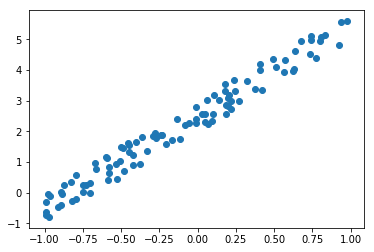

In [54]:
plt.scatter(x[:,0], y);

We want to find weights a such that you minimise the error between the points and the line `x@a`. Need an error function or loss function. Use mean sqaure error in this case

In [0]:
def mse(y_hat, y):
  return ((y_hat-y)**2).mean()

Calc mse with an dummy example of  `a = (-1.0, 1.0)`

In [0]:
a = tensor(-1.,1)

In [57]:
y_hat = x@a
mse(y_hat, y)

tensor(6.0070)

So our loss is the result of that tensor. Plotting the line reveals that our prediction is pretty terriblibly wrong

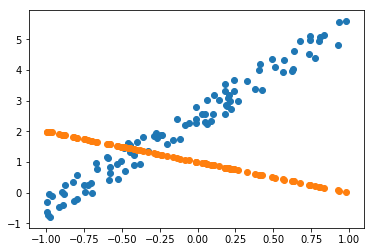

In [58]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0], y_hat)

We want to aim to improve guess by experimenting with `a` and finding the best set of values that minimise the loss function

### Gradient Descent

Gradient decent implemeted in PyTorch

In [59]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
  y_hat = x@a
  loss = mse(y, y_hat)
  if t % 10 == 0:
    print(loss)
  loss.backward()
  with torch.no_grad():
    a.sub_(lr * a.grad)
    a.grad.zero_()

In [63]:
lr = 1e-1
for t in range(100):
  update()

tensor(0.0893, grad_fn=<MeanBackward0>)
tensor(0.0892, grad_fn=<MeanBackward0>)
tensor(0.0892, grad_fn=<MeanBackward0>)
tensor(0.0892, grad_fn=<MeanBackward0>)
tensor(0.0892, grad_fn=<MeanBackward0>)
tensor(0.0892, grad_fn=<MeanBackward0>)
tensor(0.0892, grad_fn=<MeanBackward0>)
tensor(0.0892, grad_fn=<MeanBackward0>)
tensor(0.0892, grad_fn=<MeanBackward0>)
tensor(0.0892, grad_fn=<MeanBackward0>)


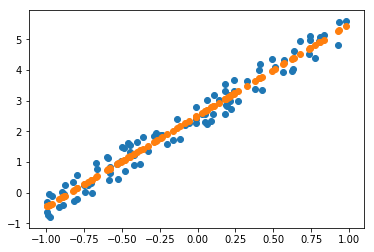

In [65]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0], x@a)